# Assignment 5 - Multi Linear Regression
## Problem 2

Prepare a prediction model for price of Toyota Corolla Cars. Do necessary transformations for getting better predictions of price and make a table containing R<sup>2</sup> value for each prepared model.

Consider only the below columns and prepare a prediction model for predicting Price.

Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

In [1]:
import pandas as pd
import numpy as np
import pandas_profiling as pp
import statsmodels.formula.api as smf
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
df_raw=pd.read_csv('ToyotaCorolla.csv', encoding='latin1')
df=df_raw.loc[:,("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]
df.rename(columns={'Price':'price','Age_08_04':'age', 'KM':'km', 'HP':'hp','Doors':'doors','Gears':'gears','Quarterly_Tax':'qtrly_tax','Weight':'weight'}, inplace = True)
df.head()

,price,age,km,hp,cc,doors,gears,qtrly_tax,weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   price      1436 non-null   int64
 1   age        1436 non-null   int64
 2   km         1436 non-null   int64
 3   hp         1436 non-null   int64
 4   cc         1436 non-null   int64
 5   doors      1436 non-null   int64
 6   gears      1436 non-null   int64
 7   qtrly_tax  1436 non-null   int64
 8   weight     1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


## Correlation Matrix

In [4]:
df.corr()

,price,age,km,hp,cc,doors,gears,qtrly_tax,weight
price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
age,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
km,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
hp,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
qtrly_tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


## Plotting the variables

In [5]:
from matplotlib import pyplot as plt

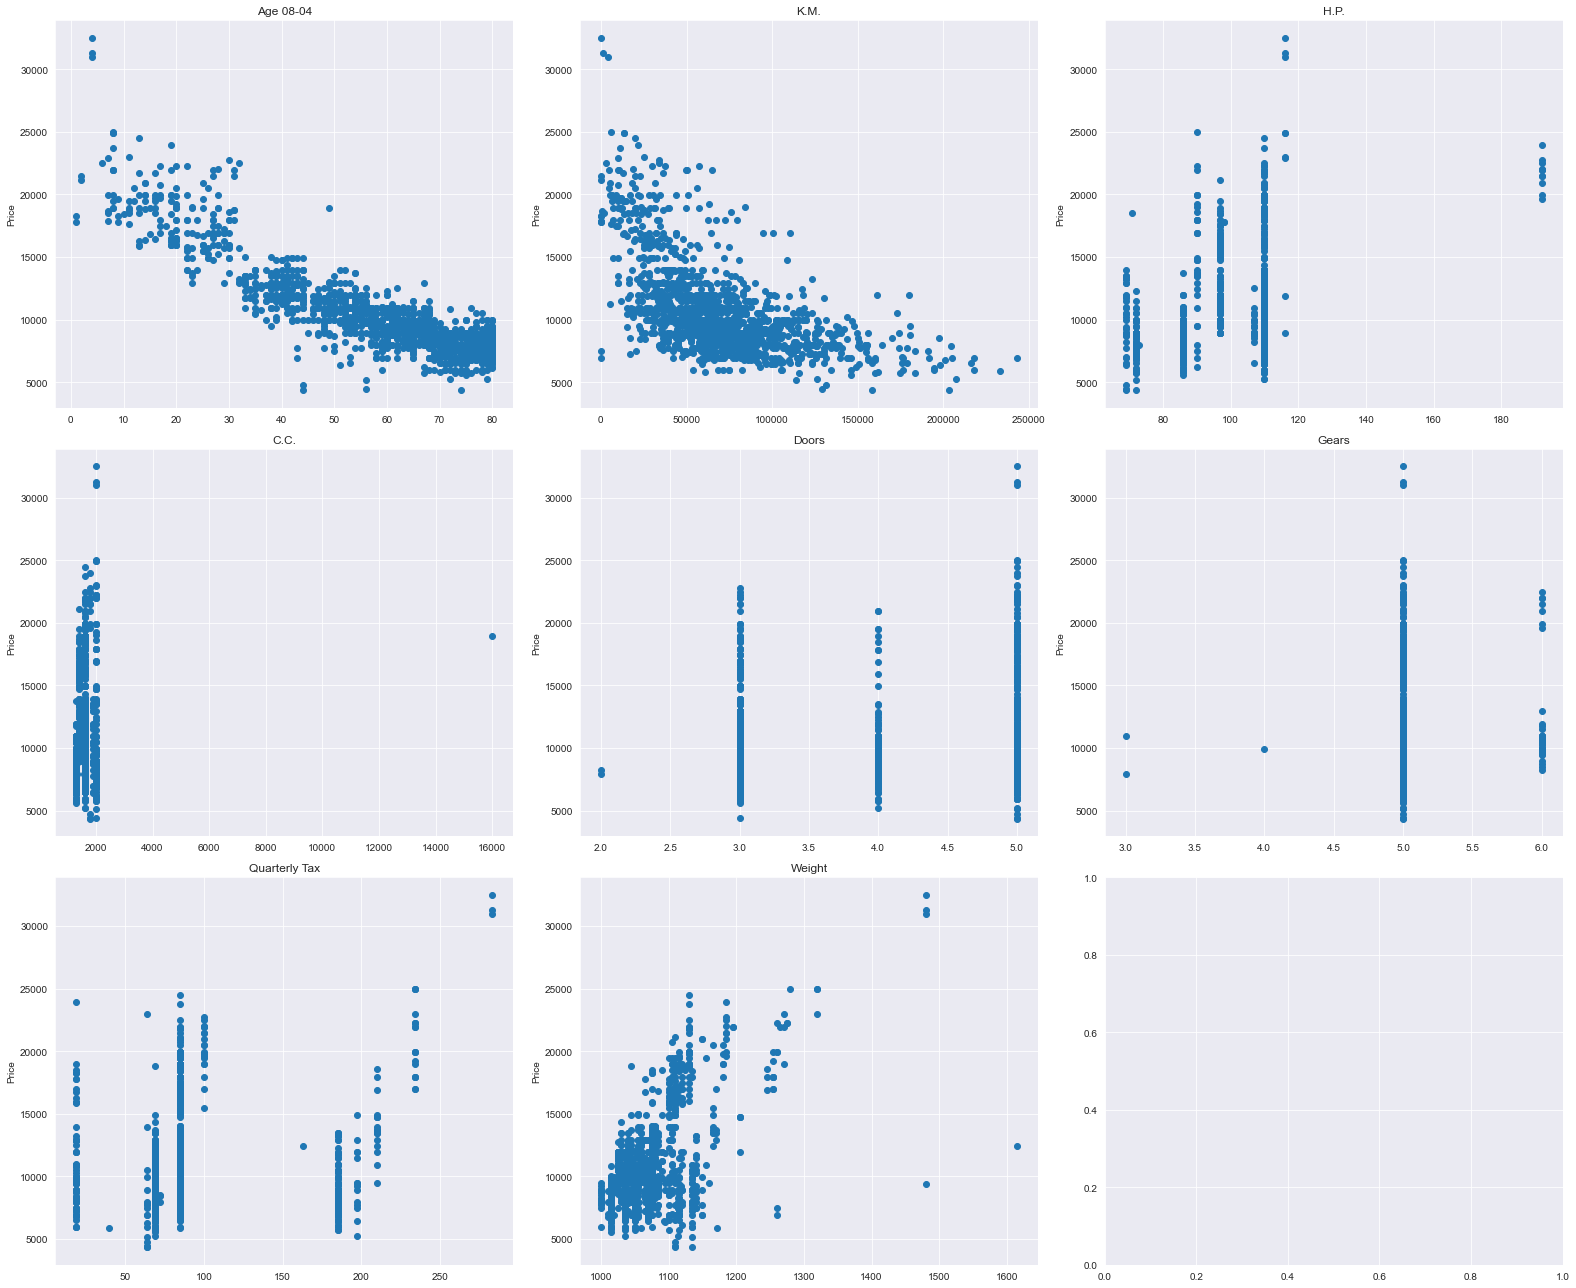

In [6]:
fig,axes = plt.subplots(nrows=3,ncols=3,figsize=(22,18))

axes[0][0].plot(df['age'],df['price'],'o')
axes[0][0].set_ylabel("Price")
axes[0][0].set_title("Age 08-04")

axes[0][1].plot(df['km'],df['price'],'o')
axes[0][1].set_title("K.M.")
axes[0][1].set_ylabel("Price")

axes[0][2].plot(df['hp'],df['price'],'o')
axes[0][2].set_title("H.P.");
axes[0][2].set_ylabel("Price")
plt.tight_layout();

axes[1][0].plot(df['cc'],df['price'],'o')
axes[1][0].set_title("C.C.");
axes[1][0].set_ylabel("Price")
plt.tight_layout();

axes[1][1].plot(df['doors'],df['price'],'o')
axes[1][1].set_title("Doors");
axes[1][1].set_ylabel("Price")
plt.tight_layout();

axes[1][2].plot(df['gears'],df['price'],'o')
axes[1][2].set_title("Gears");
axes[1][2].set_ylabel("Price")
plt.tight_layout();

axes[2][0].plot(df['qtrly_tax'],df['price'],'o')
axes[2][0].set_title("Quarterly Tax");
axes[2][0].set_ylabel("Price")
plt.tight_layout();

axes[2][1].plot(df['weight'],df['price'],'o')
axes[2][1].set_title("Weight");
axes[2][1].set_ylabel("Price")
plt.tight_layout();

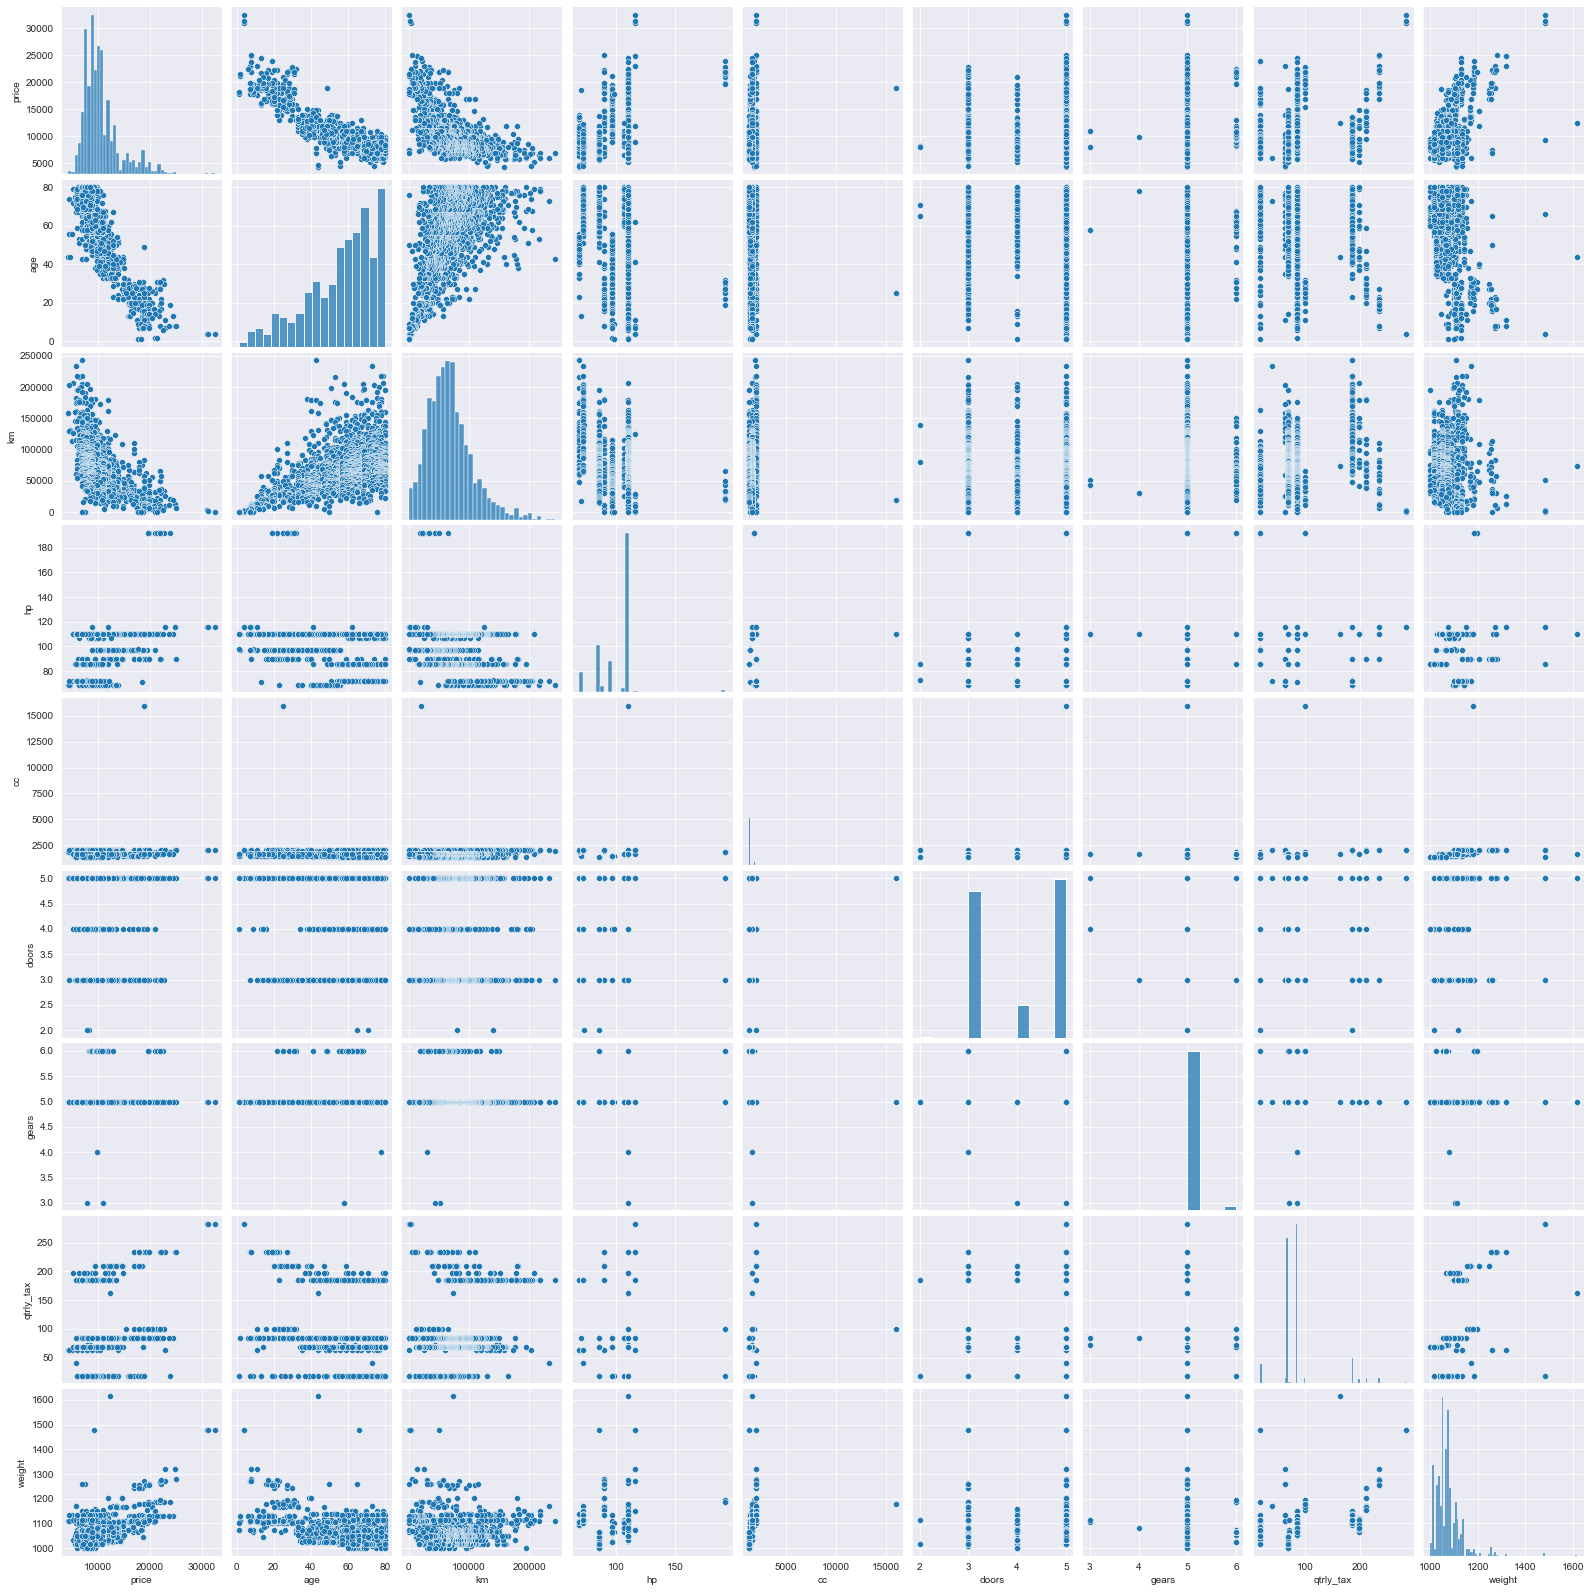

In [7]:
sns.pairplot(df)

In [8]:
# EDA_report= pp.ProfileReport(df)
# EDA_report.to_file(output_file='report_toyota.html')

## Building the Model

In [9]:
model1 = smf.ols('price~age+km+hp+cc+doors+gears+qtrly_tax+weight',data=df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Tue, 29 Jun 2021   Prob (F-statistic):               0.00
Time:                        21:57:01   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
age         -121.6584      2.616    -46.512      0.000    -126.789    -116.527
km            -0.0208      0.001    -16.622      0.000      -0.023      -0.018
hp            31.6809      2.818     11.241      0.000      26.152      37.209
cc            -0.1211      0.090     -1.344      0.179      -0.298       0.056
doors         -1.6166     40.006     -0.040      0.968     -80.093      76.859
gears        594.3199    197.055      3.016      0.003     207.771     980.869
qtrly_tax      3.9491      1.310      3.015      0.003       1.379       6.519
weight        16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The model is good considering that no refining has been made on any of the variables. The preliminary R<sup>2</sup> is 0.864 which we hope to improve as we build into the final model. <br> 
The p-values of Doors and C.C. reveals that we have to accept the null hyothesis which means that they don't contribute much to the model and should be excluded from the final model. 

Now, let us build SLR models with each of the variables to get a better understanding and make our decisions to improve the final model.

In [10]:
#Age
model2 = smf.ols('price~age',data=df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     4758.
Date:                Tue, 29 Jun 2021   Prob (F-statistic):               0.00
Time:                        21:57:01   Log-Likelihood:                -12756.
No. Observations:                1436   AIC:                         2.552e+04
Df Residuals:                    1434   BIC:                         2.553e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.029e+04    146.097    138.908      0.000       2e+04    2.06e+04
age         -170.9336      2.478    -68.978      0.000    -175.795    -166.073
==============================================================================
Omnibus:                      359.275   Durbin-Watson:                   1.214
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2774.226
Skew:                           0.946   Prob(JB):                         0.00
Kurtosis:                       9.541   Cond. No.                         187.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<b>Age</b> alone can predict 76.8% of variance in the Price data. Hence, probably the most important part of the model.

In [11]:
# K.M.
model3 = smf.ols('price~km',data=df).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.325
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     690.0
Date:                Tue, 29 Jun 2021   Prob (F-statistic):          1.76e-124
Time:                        21:57:01   Log-Likelihood:                -13525.
No. Observations:                1436   AIC:                         2.705e+04
Df Residuals:                    1434   BIC:                         2.706e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.451e+04    163.915     88.510      0.000    1.42e+04    1.48e+04
km            -0.0551      0.002    -26.268      0.000      -0.059      -0.051
==============================================================================
Omnibus:                      390.716   Durbin-Watson:                   0.386
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1115.783
Skew:                           1.388   Prob(JB):                    5.14e-243
Kurtosis:                       6.308   Cond. No.                     1.63e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.63e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<b>K.M.</b> can predict about 32.5% of variance in the Price data. Hence, a good addition to the final model.

In [12]:
# H.P.
model4 = smf.ols('price~hp',data=df).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     158.0
Date:                Tue, 29 Jun 2021   Prob (F-statistic):           1.93e-34
Time:                        21:57:01   Log-Likelihood:                -13732.
No. Observations:                1436   AIC:                         2.747e+04
Df Residuals:                    1434   BIC:                         2.748e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2990.2764    622.568      4.803      0.000    1769.035    4211.518
hp            76.2600      6.068     12.568      0.000      64.357      88.163
==============================================================================
Omnibus:                      448.876   Durbin-Watson:                   0.338
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1327.172
Skew:                           1.591   Prob(JB):                    6.43e-289
Kurtosis:                       6.472   Cond. No.                         703.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<b>H.P</b> could predict little about 9.9% of variance in the Price data. Hence, may be added to the final model after checking out combinations.

In [13]:
# Weight
model5 = smf.ols('price~weight',data=df).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.337
Method:                 Least Squares   F-statistic:                     731.5
Date:                Tue, 29 Jun 2021   Prob (F-statistic):          1.63e-130
Time:                        21:57:01   Log-Likelihood:                -13511.
No. Observations:                1436   AIC:                         2.703e+04
Df Residuals:                    1434   BIC:                         2.704e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.222e+04   1589.807    -20.264      0.000   -3.53e+04   -2.91e+04
weight        40.0444      1.481     27.046      0.000      37.140      42.949
==============================================================================
Omnibus:                      105.784   Durbin-Watson:                   0.562
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              531.408
Skew:                           0.028   Prob(JB):                    4.04e-116
Kurtosis:                       5.980   Cond. No.                     2.19e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.19e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<b>Weight</b> alone can predict 33.8% of variance in the Price data. Hence, a must have addition in the final model.

## Trying out some Multi linear Regression Models

In [14]:
model6 = smf.ols('price~age+km+weight',data=df).fit()
model6.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     2665.
Date:                Tue, 29 Jun 2021   Prob (F-statistic):               0.00
Time:                        21:57:01   Log-Likelihood:                -12454.
No. Observations:                1436   AIC:                         2.492e+04
Df Residuals:                    1432   BIC:                         2.494e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1880.3356    962.718     -1.953      0.051   -3768.825       8.153
age         -120.2212      2.742    -43.841      0.000    -125.600    -114.842
km            -0.0242      0.001    -20.142      0.000      -0.027      -0.022
weight        19.5760      0.836     23.409      0.000      17.936      21.216
==============================================================================
Omnibus:                      221.061   Durbin-Watson:                   1.523
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2197.082
Skew:                          -0.373   Prob(JB):                         0.00
Kurtosis:                       9.013   Cond. No.                     2.01e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.01e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
model7 = smf.ols('price~age+km+hp+weight',data=df).fit()
model7.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     2230.
Date:                Tue, 29 Jun 2021   Prob (F-statistic):               0.00
Time:                        21:57:01   Log-Likelihood:                -12386.
No. Observations:                1436   AIC:                         2.478e+04
Df Residuals:                    1431   BIC:                         2.481e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4014.6418    936.044     -4.289      0.000   -5850.808   -2178.476
age         -122.4245      2.623    -46.668      0.000    -127.570    -117.278
km            -0.0196      0.001    -16.271      0.000      -0.022      -0.017
hp            30.2119      2.539     11.897      0.000      25.230      35.193
weight        18.5319      0.803     23.084      0.000      16.957      20.107
==============================================================================
Omnibus:                      197.115   Durbin-Watson:                   1.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1498.712
Skew:                          -0.384   Prob(JB):                         0.00
Kurtosis:                       7.946   Cond. No.                     2.05e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.05e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

It can be seen that dropping C.C, Doors, Gears and Quarterly tax actually reduces the R<sup>2</sup> value by a miniscule amount of 0.2%

## Variance Inflation Factor

In [16]:
rsq_age = smf.ols('age~km+hp+gears+qtrly_tax+weight',data=df).fit().rsquared  
vif_age = 1/(1-rsq_age)

rsq_km = smf.ols('km~age+hp+gears+qtrly_tax+weight',data=df).fit().rsquared  
vif_km = 1/(1-rsq_km) 

rsq_hp = smf.ols('hp~age+km+gears+qtrly_tax+weight',data=df).fit().rsquared  
vif_hp = 1/(1-rsq_hp) 

rsq_gears = smf.ols('gears~age+km+hp+qtrly_tax+weight',data=df).fit().rsquared  
vif_gears = 1/(1-rsq_gears) 

rsq_qtrly_tax = smf.ols('qtrly_tax~age+km+hp+gears+weight',data=df).fit().rsquared  
vif_qtrly_tax = 1/(1-rsq_qtrly_tax) 

rsq_weight = smf.ols('weight~age+km+hp+gears+qtrly_tax',data=df).fit().rsquared  
vif_weight = 1/(1-rsq_weight) 

# Storing vif values in a data frame
d1 = {'Variables':['age','km','hp','gears','qtrly_tax','weight'],'VIF':[vif_age,vif_km,vif_hp,vif_gears,vif_qtrly_tax,vif_weight]}
vif_frame = pd.DataFrame(d1)  
vif_frame

,Variables,VIF
0,age,1.884335
1,km,1.746492
2,hp,1.400460
3,gears,1.058932
4,qtrly_tax,2.263600
5,weight,2.297072


## Residual Analysis
### Test for Normality

### 1. QQ Plots
#### Model 7

In [17]:
import statsmodels.api as sm

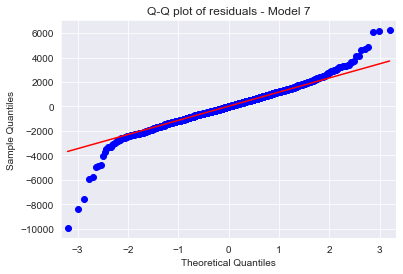

In [18]:
qqplot1=sm.qqplot(model7.resid,line='q')
plt.title("Q-Q plot of residuals - Model 7")
plt.show()

### 2. Residual Plot for Homoscedasticity
#### Model 7

In [19]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

Text(0, 0.5, 'Standardized residual values')

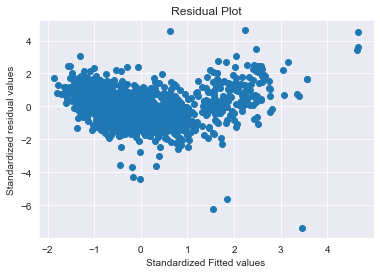

In [20]:
plt.scatter(get_standardized_values(model7.fittedvalues),
            get_standardized_values(model7.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')

There seems to be some outliers. We have to make sure will skeddadle.

## Residual vs Regressors - Model7

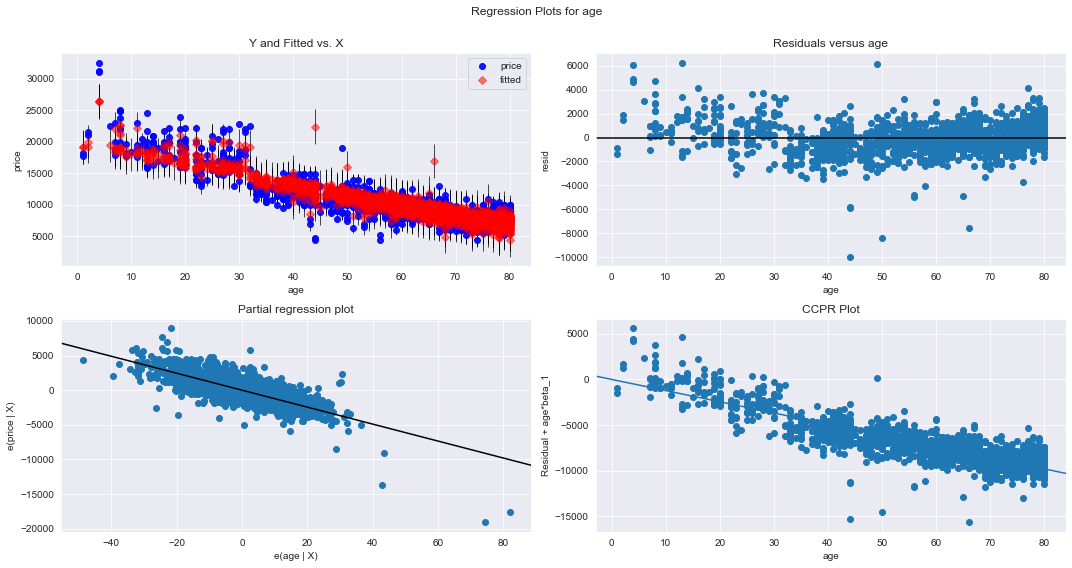

In [21]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model7, "age", fig=fig)
plt.show()

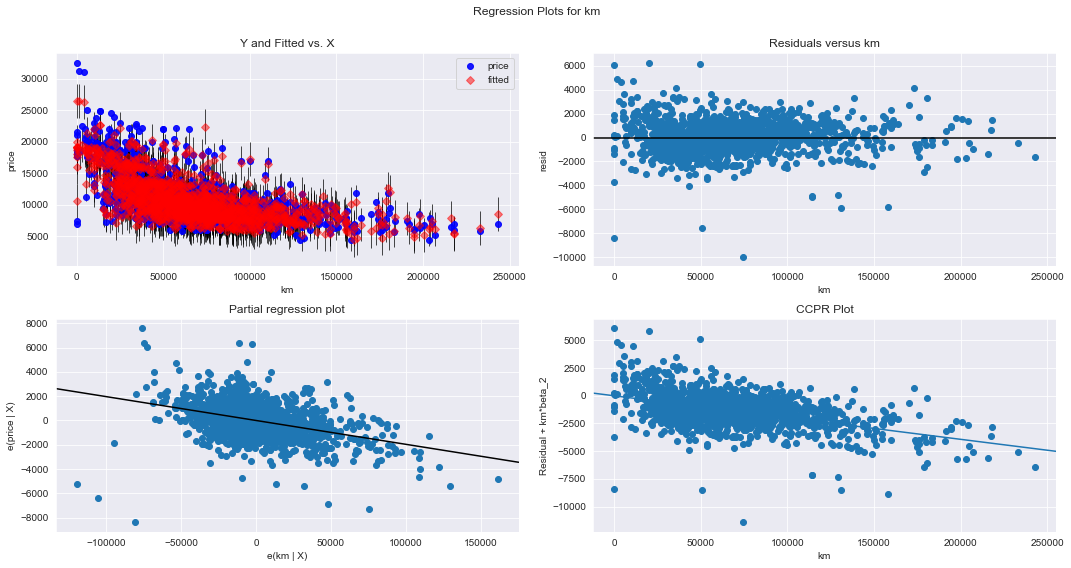

In [22]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model7, "km", fig=fig)
plt.show()

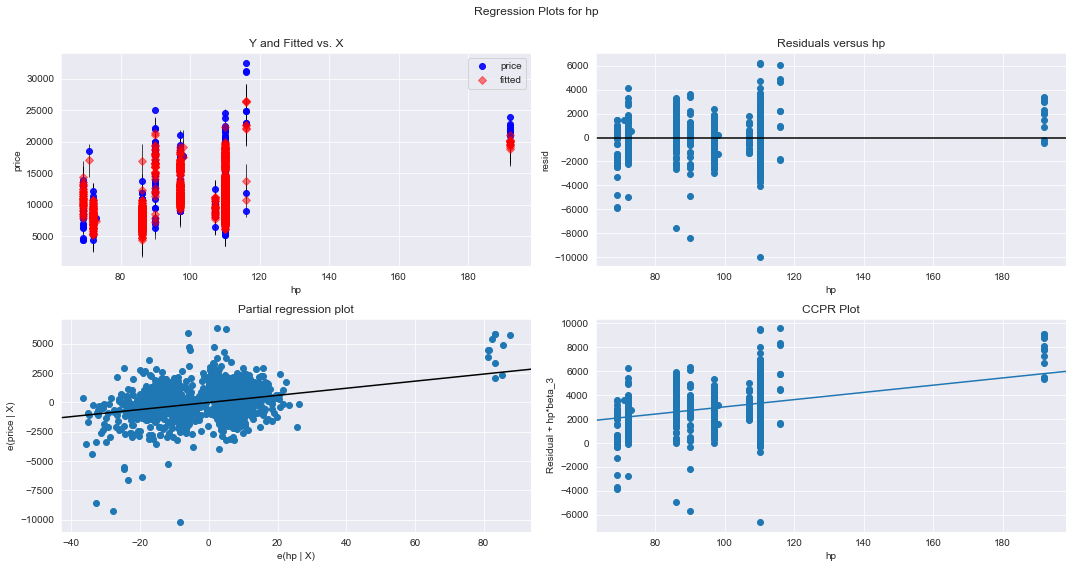

In [23]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model7, "hp", fig=fig)
plt.show()

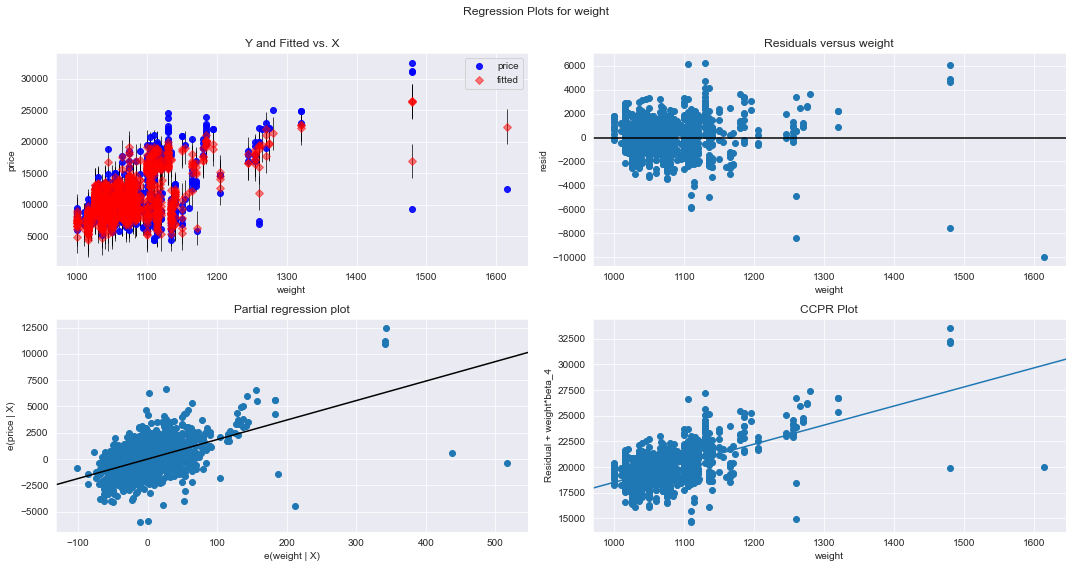

In [24]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model7, "weight", fig=fig)
plt.show()

Some distributions are pretty satisfactory while some seems meh.

# Model Deletion Diagnostics

### Cook's Distance
#### Stem Plot - Model7

In [25]:
model_influence = model7.get_influence()
(c, _) = model_influence.cooks_distance

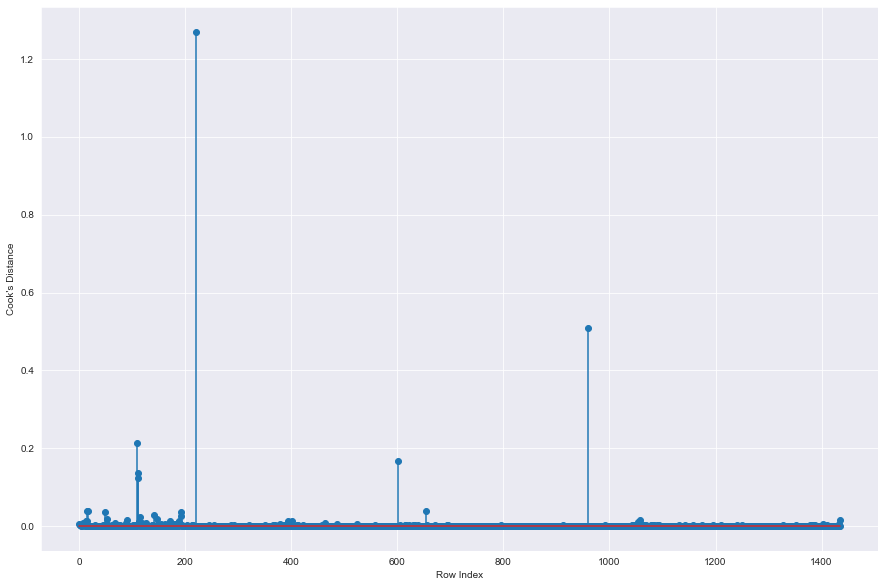

In [26]:
#Plotting the influencers values using a stem plot
fig = plt.subplots(figsize=(15, 10))
plt.stem(np.arange(len(df)), np.round(c, 3))
plt.xlabel('Row Index')
plt.ylabel("Cook's Distance")
plt.show()

We can see the outliers here as we predicted. Now let's make sure they are removed before buildibg the final model

In [27]:
#index and value of influencer where c is more than 0.5
(np.argmax(c),np.max(c))

(221, 1.2699400109582968)

### High Influence points 
#### Influence Plot - Model7

In [28]:
from statsmodels.graphics.regressionplots import influence_plot

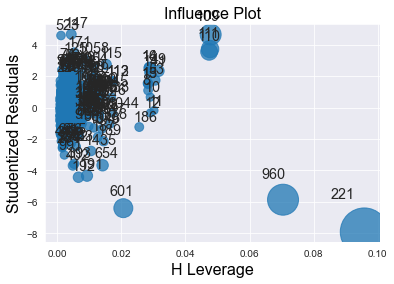

In [29]:
influence_plot(model7)
plt.show()

Points at indices 960, 221 sure needs to go.

In [30]:
df[df.index.isin([110,111,601,221,960])]

,price,age,km,hp,cc,doors,gears,qtrly_tax,weight
110,31000,4,4000,116,2000,5,5,283,1480
111,31275,4,1500,116,2000,5,5,283,1480
221,12450,44,74172,110,1600,5,5,163,1615
601,7500,50,1,90,2000,3,5,64,1260
960,9390,66,50806,86,1300,3,5,19,1480


### Dropping the Outliers

In [31]:
df_clean = df.copy()
df_clean = df_clean.drop(df_clean.index[[221,960]],axis=0).reset_index()
df_clean=df_clean.drop(['index','cc','doors','gears','qtrly_tax'],axis=1)
df_clean.head()

,price,age,km,hp,weight
0,13500,23,46986,90,1165
1,13750,23,72937,90,1165
2,13950,24,41711,90,1165
3,14950,26,48000,90,1165
4,13750,30,38500,90,1170


# Building the Final Model

In [32]:
final_model = smf.ols('price~age+km+hp+weight',data=df_clean).fit()
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     2425.
Date:                Tue, 29 Jun 2021   Prob (F-statistic):               0.00
Time:                        21:57:07   Log-Likelihood:                -12317.
No. Observations:                1434   AIC:                         2.464e+04
Df Residuals:                    1429   BIC:                         2.467e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7912.0770    976.375     -8.104      0.000   -9827.360   -5996.794
age         -116.2934      2.599    -44.754      0.000    -121.391    -111.196
km            -0.0213      0.001    -18.097      0.000      -0.024      -0.019
hp            28.7916      2.455     11.730      0.000      23.977      33.607
weight        22.0984      0.846     26.124      0.000      20.439      23.758
==============================================================================
Omnibus:                      122.446   Durbin-Watson:                   1.618
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              622.478
Skew:                          -0.201   Prob(JB):                    6.77e-136
Kurtosis:                       6.203   Cond. No.                     2.22e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.22e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We can see that the analysis and the corresponding remedies we made have come to fruition in the final model.

Checking for any more influences in the final model:
### Cook's Plot
#### Final Model

In [33]:
model_influence_x = final_model.get_influence()
(c_V, _) = model_influence_x.cooks_distance

Text(0, 0.5, "Cook's Distance")

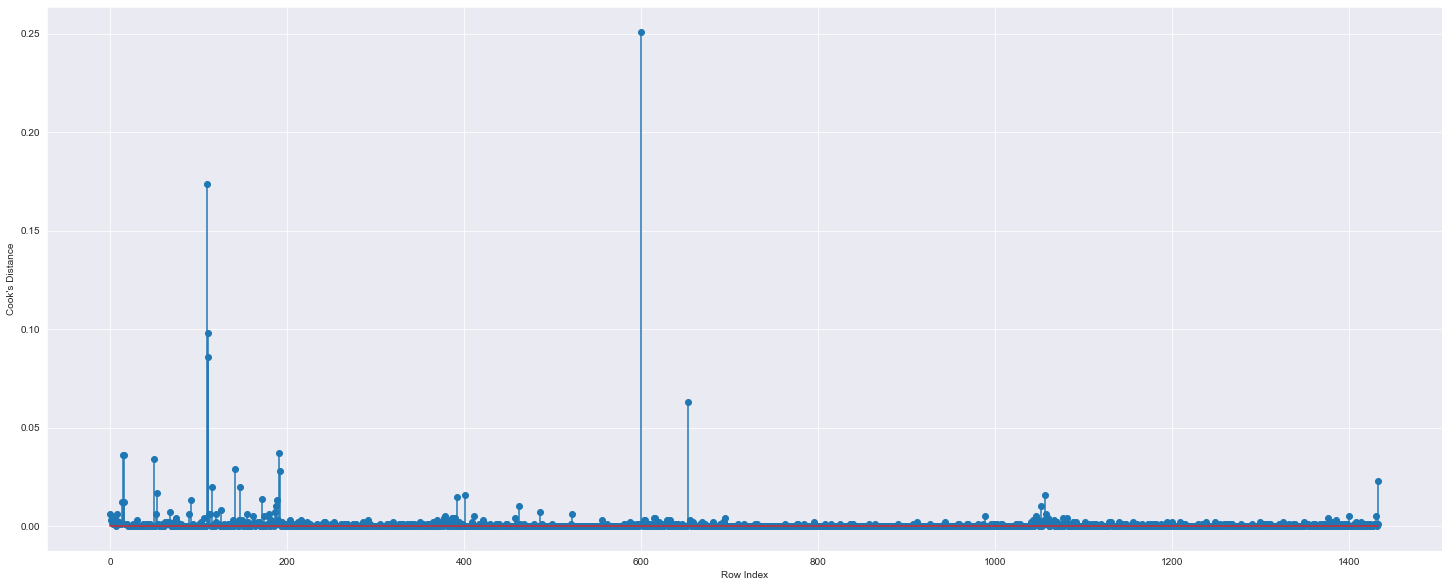

In [34]:
fig= plt.subplots(figsize=(25,10))
plt.stem(np.arange(len(df_clean)),np.round(c_V,3))
plt.xlabel('Row Index')
plt.ylabel("Cook's Distance")

Since all the residuals seems to be less than 0.5, we're fine.

In [35]:
p_df=pd.DataFrame({'age':20,'km':46000,'hp':90,'weight':1100},index=[1])
p_df

,age,km,hp,weight
1,20,46000,90,1100


In [36]:
final_model.predict(p_df)

1    15682.7
dtype: float64

## One alternate method is used to answer the same question. Notebook file is made available in the same folder.